In [ ]:
import numpy as np
import pandas
import pickle
import random
import matplotlib.pyplot as plt


In [ ]:
train_data = pandas.read_csv('data/train_in.csv').to_numpy()
train_labels = pandas.read_csv('data/train_out.csv').to_numpy()
test_data = pandas.read_csv('data/test_in.csv').to_numpy()
test_labels = pandas.read_csv('data/test_out.csv').to_numpy()
train_labels.shape = (train_labels.size,)
test_labels.shape = (test_labels.size,)

In [ ]:
class MultiClassPerceptron():
  accuracy = 0.0
  """
  A Multi-Class Perceptron class
  :param  X                 Train data
  :param  y                 Train labels
  :param  BIAS              BIAS
  """
  def __init__(self, X, y, BIAS=0.1):
    self.classes = sorted(np.unique(y).tolist())
    z = np.ones((len(y),1))
    self.X = np.hstack((X, z))
    self.y = y
    self.BIAS = BIAS
    self.current_iteration = 0
    self.error_rates = []
    # Random weight vectors with BIAS        ...initialize weights w at random
    random_weights = np.array([random.random() for _ in range(len(X[0]))]+[BIAS])
    self.weight_vectors = np.tile(random_weights, (len(self.classes),1))
  
  def train(self):
      """
      while (there are misclassified training examples)
      Select a misclassified example (x, ci
      )
      Then some nodes are activated more than the node ci
      1) update weights of these nodes by -x: w = w - x;
      2) update weights of the node ci
      by x: w = w + x;
      3) leave weights of all other nodes unchanged
      end-while;

      """
      self.current_iteration=0
      class_predictions=False
      sample_size = len(self.y)
      while not np.all(class_predictions == self.y):
        class_scores = np.dot(self.weight_vectors, self.X.transpose())
        max_scores = np.max(class_scores, axis=0)
        class_predictions = np.argmax(class_scores, axis=0)
        # print(f'{np.count_nonzero(class_predictions==train_labels)}/{len(self.y)}')
        for i in range(len(self.y)):
          if self.y[i] != class_predictions[i]: # Whether I predicted correctly
            for c in self.classes:
              if c == self.y[i]: # For the correct class the answer that it should be, increase weight so it much more likely to know correct input
                self.weight_vectors[c][:-1] += self.X[i][:-1]
              elif class_scores[c][i] >= max_scores[i]: # For every class that predicted much more likely than the correct one, reduce weight so they don't get in they way of correct node
                self.weight_vectors[c][:-1] -= self.X[i][:-1]
        self.error_rates.append(1-(np.count_nonzero(class_predictions == self.y) / sample_size))
        self.weight_vectors[:,0] = 0
        self.current_iteration += 1      
      print(f"Achieved result in {self.current_iteration} iterations")

  def predict(self, test_arr):
      z = np.ones((len(test_labels),1))
      test_adjusted = np.hstack((test_arr, z))
      class_scores = np.dot(mcp.weight_vectors, test_adjusted.transpose())
      class_predictions = np.argmax(class_scores, axis=0)
      print(f"Perceptron error rate: {(1-(np.count_nonzero(class_predictions==test_labels)/len(test_labels)))*100}")
      return class_predictions


Achieved result in 271 iterations
Perceptron error rate: 12.91291291291291


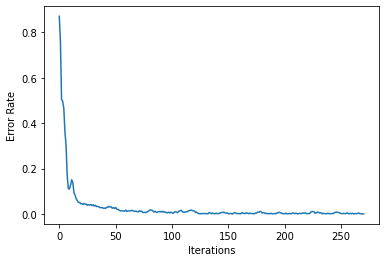

In [ ]:
mcp = MultiClassPerceptron(train_data,train_labels)
mcp.train()
mcp.predict(test_data)
plt.xlabel("Iterations")
plt.ylabel("Error Rate")
plt.plot(mcp.error_rates)